In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for creating various types of plots
import seaborn as sns #high-level interface for creating plots with minimal code. 

plt.style.use('ggplot')

import nltk
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite
/kaggle/input/flipkart-product-review-dataset/flipkart_product.csv


Loading file to python notebook

In [2]:
df = pd.read_csv('/kaggle/input/flipkart-product-review-dataset/flipkart_product.csv', encoding="unicode_escape")

In [3]:
df.describe()

,ProductName,Price,Rate,Review,Summary
count,189874,189873,189873,189870,189860
unique,812,561,9,1264,98343
top,MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (P...,"â¹1,299",5,Nan,Good
freq,9278,10005,108694,20862,14175


In [4]:

df = df.assign(Id=range(len(df)))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
 5   Id           189874 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 8.7+ MB


In [6]:
df.head()

,ProductName,Price,Rate,Review,Summary,Id
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...,0
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling,1
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...,2
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan,3
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,4


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
Id             0
dtype: int64

It is imbalanced data but before to that lets pre-process text columns and remove noise

In [9]:
def preprocess(row):
    row=re.sub('[^a-zA-Z0-9]', ' ', row)
    row= re.sub('\s+', ' ', row)
    return row

Drop Price Column

In [10]:
df['Review']=df['Review'].apply(lambda x: preprocess(x))
df['Summary']=df['Summary'].apply(lambda x: preprocess(x))
df['ProductName']=df['ProductName'].apply(lambda x: preprocess(x))
df.drop(['Price'],axis=1,inplace=True)

Cleaning Rate column to make a bar plot 

In [11]:
df=df[(df['Rate'] == '5') | (df['Rate'] == '4') | (df['Rate'] == '3') | (df['Rate'] == '2') | (df['Rate'] == '1') ]

df['Rate'].value_counts()

Rate
5    108684
4     39649
1     19607
3     15680
2      6233
Name: count, dtype: int64

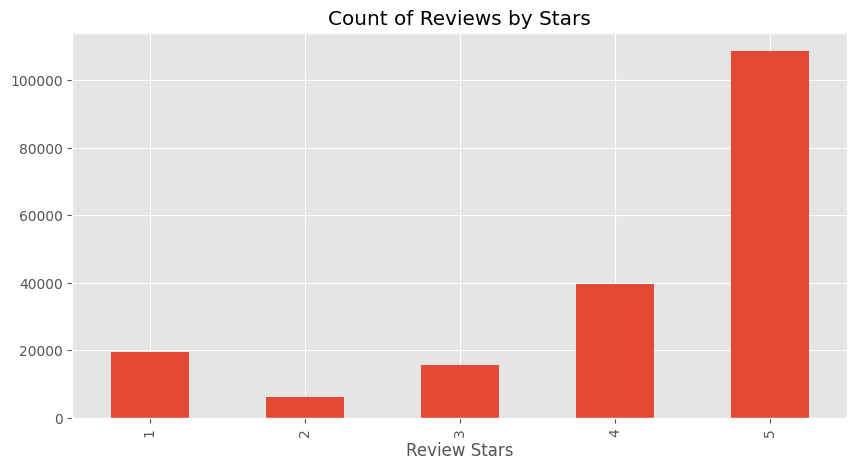

In [12]:
ax = df['Rate'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

working with an example 

In [13]:
example = df['Summary'][42]
print(example)

feedback given after using one week the cooler is amazing it s making the whole room cooling you should install the cooler near to your windows the delivery was on time as well the delivery boy also very supportive


using nltk word tokenizer to break sentences to individual tokens 

In [14]:
tokens = nltk.word_tokenize(example)
tokens

['feedback',
 'given',
 'after',
 'using',
 'one',
 'week',
 'the',
 'cooler',
 'is',
 'amazing',
 'it',
 's',
 'making',
 'the',
 'whole',
 'room',
 'cooling',
 'you',
 'should',
 'install',
 'the',
 'cooler',
 'near',
 'to',
 'your',
 'windows',
 'the',
 'delivery',
 'was',
 'on',
 'time',
 'as',
 'well',
 'the',
 'delivery',
 'boy',
 'also',
 'very',
 'supportive']

Classify the tokens into noun adjective and soo on

In [15]:
tagged = nltk.pos_tag(tokens)
tagged

[('feedback', 'NN'),
 ('given', 'VBN'),
 ('after', 'IN'),
 ('using', 'VBG'),
 ('one', 'CD'),
 ('week', 'NN'),
 ('the', 'DT'),
 ('cooler', 'NN'),
 ('is', 'VBZ'),
 ('amazing', 'VBG'),
 ('it', 'PRP'),
 ('s', 'JJ'),
 ('making', 'VBG'),
 ('the', 'DT'),
 ('whole', 'JJ'),
 ('room', 'NN'),
 ('cooling', 'VBG'),
 ('you', 'PRP'),
 ('should', 'MD'),
 ('install', 'VB'),
 ('the', 'DT'),
 ('cooler', 'NN'),
 ('near', 'IN'),
 ('to', 'TO'),
 ('your', 'PRP$'),
 ('windows', 'NNS'),
 ('the', 'DT'),
 ('delivery', 'NN'),
 ('was', 'VBD'),
 ('on', 'IN'),
 ('time', 'NN'),
 ('as', 'IN'),
 ('well', 'RB'),
 ('the', 'DT'),
 ('delivery', 'NN'),
 ('boy', 'NN'),
 ('also', 'RB'),
 ('very', 'RB'),
 ('supportive', 'JJ')]

In [16]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  feedback/NN
  given/VBN
  after/IN
  using/VBG
  one/CD
  week/NN
  the/DT
  cooler/NN
  is/VBZ
  amazing/VBG
  it/PRP
  s/JJ
  making/VBG
  the/DT
  whole/JJ
  room/NN
  cooling/VBG
  you/PRP
  should/MD
  install/VB
  the/DT
  cooler/NN
  near/IN
  to/TO
  your/PRP$
  windows/NNS
  the/DT
  delivery/NN
  was/VBD
  on/IN
  time/NN
  as/IN
  well/RB
  the/DT
  delivery/NN
  boy/NN
  also/RB
  very/RB
  supportive/JJ)


In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [18]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [19]:
print(sia.polarity_scores(example))

{'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.8122}


running the sia for the complete dataset and making a dict. res{} storing polarity scores and Id

In [20]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Summary']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/189853 [00:00<?, ?it/s]

Converting a dictionary to a dataset and left joining both the dataset

In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [22]:
vaders.head()

,Id,neg,neu,pos,compound,ProductName,Rate,Review,Summary
0,0,0.000,0.388,0.612,0.9635,Candes 12 L Room Personal Air Cooler White Bla...,5,Super,Great cooler excellent air flow and for this p...
1,1,0.000,0.240,0.760,0.8591,Candes 12 L Room Personal Air Cooler White Bla...,5,Awesome,Best budget 2 fit cooler Nice cooling
2,2,0.000,0.837,0.163,0.2382,Candes 12 L Room Personal Air Cooler White Bla...,3,Fair,The quality is good but the power of air is de...
3,3,0.376,0.396,0.228,-0.3597,Candes 12 L Room Personal Air Cooler White Bla...,1,Useless product,Very bad product it s a only a fan
4,4,0.000,0.185,0.815,0.5267,Candes 12 L Room Personal Air Cooler White Bla...,3,Fair,Ok ok product
